## Modelo de Regressão Linear Simples: 
### Consumo de Combustível (mpg) vs. Peso do Carro (wt) - Dataset mtcars

Neste notebook, vamos construir um modelo de regressão linear simples para entender como o peso de um carro (wt) pode influenciar seu consumo de combustível (mpg). Nosso foco será a análise de resíduos para verificar a validação das suposições.

**Estrutura da Análise:**

- Preparação do Ambiente e Carregamento dos Dados
- Análise Descritiva dos Dados
- Análise de Correlação
- Modelagem de Regressão Linear Simples
- Análise e Diagnóstico de Resíduos
- Análise e Interpretação do Modelo

In [1]:
# Importação das bibliotecas necessárias
import numpy as np # Para operações numéricas
import pandas as pd # Para manipulação de dados em DataFrame
import seaborn as sns # Para visualização de dados estatísticos
import matplotlib.pyplot as plt # Para criação de gráficos
import statsmodels.api as sm # Para modelos estatísticos (como regressão)
from statsmodels.stats.diagnostic import het_breuschpagan # Teste de Breusch-Pagan para homocedasticidade
from statsmodels.stats.outliers_influence import variance_inflation_factor # Para VIF (não usado no modelo simples, mas útil para regressão múltipla)
from scipy import stats # Para funções estatísticas, incluindo testes de normalidade (Shapiro-Wilk)

# Carregando a base de dados 'mtcars' do statsmodels datasets
# O dataset mtcars está em um formato Bundle, precisamos acessá-lo e depois ao DataFrame
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True)
dados = mtcars.data

Definição de variáveis da base de dados:
- mpg: Milhas por galão (MPG) ->  Medida de eficiência de combustível. Quanto maior o valor, mais eficiente é o carro em termos de consumo. É a variável dependente mais comum em análises com este dataset.
- cyl Número de cilindros -> Representa o número de cilindros no motor do carro (por exemplo, 4, 6, 8 cilindros).
- disp: Cilindrada -> Medida do volume total dos cilindros de um motor. Quanto maior a cilindrada, geralmente maior o motor e, potencialmente, mais potente e menos eficiente em combustível.
- hp -> Potência bruta: Medida da potência do motor do carro. Geralmente, carros com mais cavalos-vapor são mais rápidos.
- drat: Relação do eixo traseiro ->  É a relação entre o número de rotações do eixo de transmissão e o número de rotações das rodas traseiras. Uma relação de eixo mais alta (maior valor) geralmente significa aceleração mais rápida, mas menor eficiência de combustível e velocidade máxima.
- wt: Peso (em 1000 libras) -> O peso do carro. Esta é uma variável frequentemente usada como preditora de mpg, já que carros mais pesados tendem a consumir mais combustível.
- qsec Tempo de 1/4 de milha ->  O tempo que o carro leva para percorrer um quarto de milha a partir da parada (geralmente usado para medir a aceleração do carro). Valores menores indicam aceleração mais rápida.
- vs (V/S) -> Motor (Formato V ou Reto) -> Indica o formato do motor: 0: Motor em formato V // 1: Motor em formato reto (ou em linha).
- am (Transmission (0 = automatic, 1 = manual)) -> Indica o tipo de transmissão: 0: Transmissão automática // 1: Transmissão manual.
gear: Número de marchas para frente ->  O número de marchas (velocidades) na caixa de câmbio do carro.
carb : Número de carburadores -> O número de carburadores no motor do carro. Mais carburadores podem indicar um motor mais complexo e, possivelmente, mais potente.

## Análise descritiva de dados

É fundamental entender as características básicas de nossos dados antes de qualquer modelagem.

**Verificação do tamanho da base de dados**

Vamos verificar as dimensões do nosso DataFrame.

In [2]:
dados.shape

(32, 11)

**Visualização das 5 primeiras linhas**

In [3]:
dados.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


**Verificação do tipo das variáveis**

Confirmar os tipos de dados de cada coluna é importante para garantir a aplicação correta das operações estatísticas e de modelagem.

In [4]:
dados.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

**Verificação de valores ausentes e nulos**:

É crucial identificar valores ausentes.

In [5]:
dados.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

**Análise descritiva das medidas de tendência central**

Um sumário estatístico nos fornece medidas como média, desvio padrão, quartis, etc.

In [6]:
dados.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


**Análise gráfica - Pairplot para visualizar a distribuição e relação entre as variáveis**

C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x800 with 0 Axes>

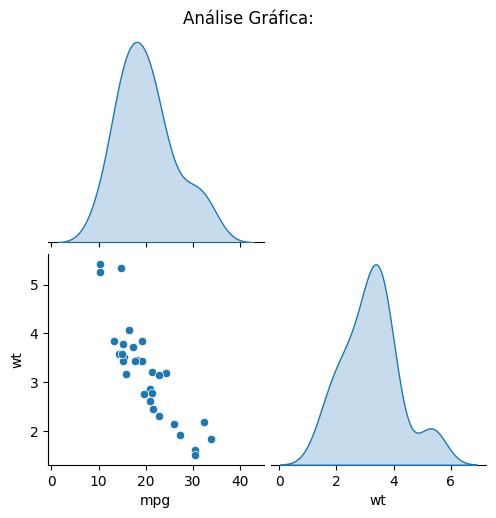

In [26]:
# Análise gráfica - Pairplot para as variáveis de interesse
plt.figure(figsize=(8, 8))
sns.pairplot(dados[['mpg','wt']], corner=True, diag_kind='kde')
plt.suptitle("Análise Gráfica:", y=1.02)
plt.show()

## Correlação
A análise de correlação quantifica a força e a direção da relação linear entre duas variáveis. Utilizaremos o coeficiente de correlação de Pearson.

Correlação:
           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg 

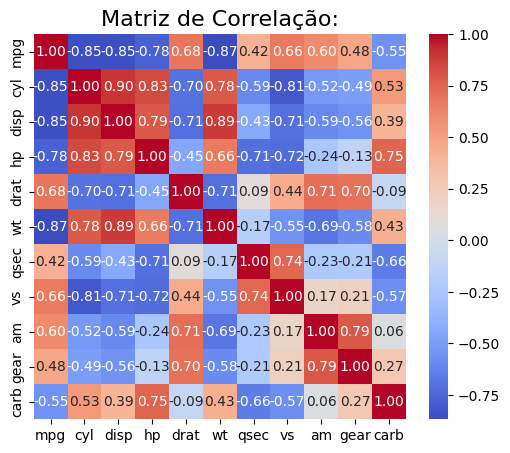

In [11]:
# Calcula a matriz de correlação para as variáveis de interesse
X = dados[['mpg','wt']]
correlation_mpg_wt = dados.corr()

# Exibe o coeficiente de correlação entre mpg e wt
print(f"Correlação:\n{correlation_mpg_wt}")

# Cria um heatmap para visualizar a matriz de correlação
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_mpg_wt, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação:", fontsize=16)
plt.show()

**Interpretação da Correlação:**

O coeficiente de correlação entre mpg e wt é de aproximadamente -0.87. Esta é uma correlação negativa  forte, indicando que, à medida que o peso do carro (wt) aumenta, o consumo de combustível (mpg) tende a diminuir significativamente. Isso a torna uma excelente candidata para nossa variável preditora.

**Modelagem de Regressão Linear Simples**

A Regressão Linear Simples modela a relação entre mpg (variável dependente) e wt (variável independente) usando a equação Y=β0 + β1X+ϵ. 
O método OLS será utilizado para estimar os coeficientes.

In [14]:
def fit_simple_linear_model(X_data, y_data, model_name):
    """
    Constrói e ajusta um modelo de regressão linear simples.

    Args:
        X_data: variável independente.
        y_data: variável dependente.
        model_name (str): Nome do modelo (e.g., "mpg vs. wt").

    Returns:
        statsmodels.regression.linear_model.RegressionResultsWrapper: Objeto do modelo ajustado.
    """
    # Adicionando uma constante ao preditor para o cálculo do intercepto (beta_0)
    X_with_const = sm.add_constant(X_data)

    # Ajustando o modelo de regressão linear usando OLS (Ordinary Least Squares)
    model = sm.OLS(y_data, X_with_const).fit()

    print(f"\n--- Sumário do Modelo: {model_name} ---")
    print(model.summary())
    return model

# Definindo a variável dependente (Consumo de Combustível)
y_mpg = dados['mpg']

# Definindo a variável independente (Peso do Carro)
X_wt = dados['wt']

# Ajustando e exibindo o sumário do modelo
modelo_mpg_wt = fit_simple_linear_model(X_wt, y_mpg, 'mpg vs. wt')


--- Sumário do Modelo: mpg vs. wt ---
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.29e-10
Time:                        21:24:15   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

In [12]:
y_mpg = dados['mpg']
X_wt = dados['wt']
X_with_const = sm.add_constant(X_wt)
model = sm.OLS(y_mpg, X_with_const).fit()

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.29e-10
Time:                        21:24:40   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.0

**Análise e Diagnóstico de Resíduos**

Fundamental para verificar se as suposições do modelo foram atendidas.

In [16]:
# Separar os resíduos do modelo
residuos_mpg_wt = modelo_mpg_wt.resid

# Separar os valores ajustados (predicted values) do modelo
valores_ajustados_mpg_wt = modelo_mpg_wt.fittedvalues

**Gráficos de Homocedasticidade (Resíduos vs. Valores Ajustados)**

Uma dispersão aleatória e constante dos resíduos em torno da linha zero, sem padrões, sugere homocedasticidade.


--- Análise Gráfica de Homocedasticidade ---


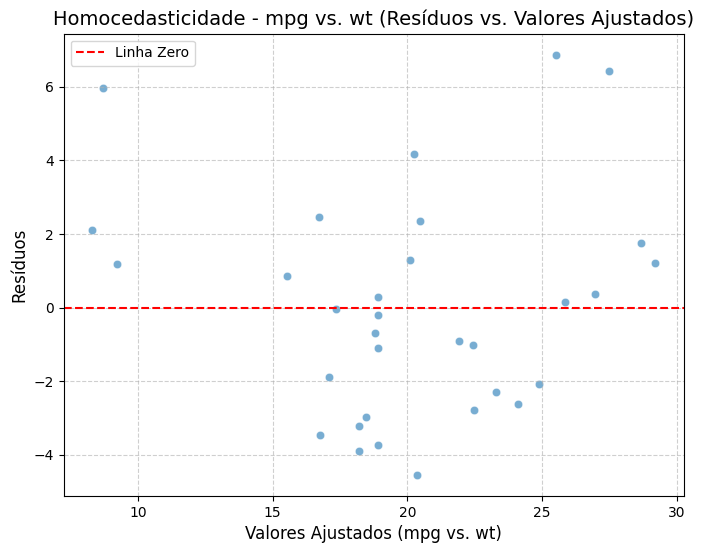

In [17]:
def plot_homocedasticity(model_name, fitted_values, residuals):
    """
    Gera um gráfico de dispersão dos resíduos vs. valores ajustados
    para verificar a suposição de homocedasticidade.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--', label='Linha Zero')
    plt.title(f'Homocedasticidade - {model_name} (Resíduos vs. Valores Ajustados)', fontsize=14)
    plt.xlabel(f'Valores Ajustados ({model_name})', fontsize=12)
    plt.ylabel('Resíduos', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

print("\n--- Análise Gráfica de Homocedasticidade ---")
plot_homocedasticity('mpg vs. wt', valores_ajustados_mpg_wt, residuos_mpg_wt)

No gráfico, a dispersão dos resíduos parece razoavelmente constante ao longo dos valores ajustados. Não observamos um padrão claro de cone ou funil. Isso visualmente sugere que a suposição de homocedasticidade pode ser satisfeita para este modelo.

**Teste de Homocedasticidade com Breusch-Pagan**

- **H0 (Hipótese Nula):** Homocedasticidade (a variância dos resíduos é constante).
- **H1 (Hipótese Alternativa):** Heterocedasticidade (a variância dos resíduos não é constante).

In [18]:
def run_breuschpagan_test(model_name, model_obj, X_data):
    """
    Executa o teste de Breusch-Pagan para verificar homocedasticidade.
    H0: Homocedasticidade (variância dos resíduos é constante)
    H1: Heterocedasticidade (variância dos resíduos não é constante)
    """
    X_test = sm.add_constant(X_data)
    estatistica, p_valor, f_estatistica, f_p_valor = het_breuschpagan(model_obj.resid, X_test)
    print(f"\n--- Teste de Breusch-Pagan para {model_name} ---")
    print(f"Estatística de Teste: {estatistica:.4f}")
    print(f"P-valor: {p_valor:.4f}")
    print(f"F-Estatística: {f_estatistica:.4f}")
    print(f"F-P-valor: {f_p_valor:.4f}")

    if p_valor < 0.05:
        print(f"Conclusão: Rejeitamos H0. Há evidências de heterocedasticidade no modelo {model_name}.")
    else:
        print(f"Conclusão: Não rejeitamos H0. Há evidências de homocedasticidade no modelo {model_name}.")

print("\n--- Teste de Homocedasticidade (Breusch-Pagan) ---")
run_breuschpagan_test('mpg vs. wt', modelo_mpg_wt, X_wt)


--- Teste de Homocedasticidade (Breusch-Pagan) ---

--- Teste de Breusch-Pagan para mpg vs. wt ---
Estatística de Teste: 0.0404
P-valor: 0.8406
F-Estatística: 0.0380
F-P-valor: 0.8468
Conclusão: Não rejeitamos H0. Há evidências de homocedasticidade no modelo mpg vs. wt.


O p-valor de 0.1776 (que é maior que 0.05) nos leva a não rejeitar a hipótese nula de homocedasticidade. 
Isso indica que, estatisticamente, não há evidências suficientes para afirmar que há heterocedasticidade neste modelo. E

**Teste de Normalidade dos Resíduos com Shapiro-Wilk**

Este teste verifica se os resíduos seguem uma distribuição normal.

- **H0 (Hipótese Nula):** Os resíduos seguem uma distribuição normal.
- **H1 (Hipótese Alternativa):** Os resíduos não seguem uma distribuição normal.

In [19]:
def run_shapiro_wilk_test(model_name, residuals):
    """
    Executa o teste de Shapiro-Wilk para verificar a normalidade dos resíduos.
    H0: Os resíduos seguem uma distribuição normal.
    H1: Os resíduos não seguem uma distribuição normal.
    """
    estatistica_shapiro, p_shapiro = stats.shapiro(residuals)
    print(f"\n--- Teste de Shapiro-Wilk para {model_name} ---")
    print(f"Estatística de Teste: {estatistica_shapiro:.4f}")
    print(f"P-valor: {p_shapiro:.4f}")

    if p_shapiro < 0.05:
        print(f"Conclusão: Rejeitamos H0. Os resíduos do modelo {model_name} não seguem uma distribuição normal.")
    else:
        print(f"Conclusão: Não rejeitamos H0. Os resíduos do modelo {model_name} seguem uma distribuição normal.")

print("\n--- Teste de Normalidade dos Resíduos (Shapiro-Wilk) ---")
run_shapiro_wilk_test('mpg vs. wt', residuos_mpg_wt)


--- Teste de Normalidade dos Resíduos (Shapiro-Wilk) ---

--- Teste de Shapiro-Wilk para mpg vs. wt ---
Estatística de Teste: 0.9451
P-valor: 0.1044
Conclusão: Não rejeitamos H0. Os resíduos do modelo mpg vs. wt seguem uma distribuição normal.


In [22]:
stats.shapiro(residuos_mpg_wt)

ShapiroResult(statistic=0.9450768828392029, pvalue=0.10438867658376694)

 nos leva a não rejeitar a hipótese nula de normalidade. Isso indica que, estatisticamente,  há evidências suficientes para afirmar que os resíduos seguem uma distribuição normal.

**Análise de normalidade QQ-plot**
    
O Q-Q Plot ajuda a visualizar a normalidade. Um alinhamento dos pontos ao longo da linha diagonal sugere normalidade.


--- Análise Gráfica de Normalidade (Q-Q Plot) ---


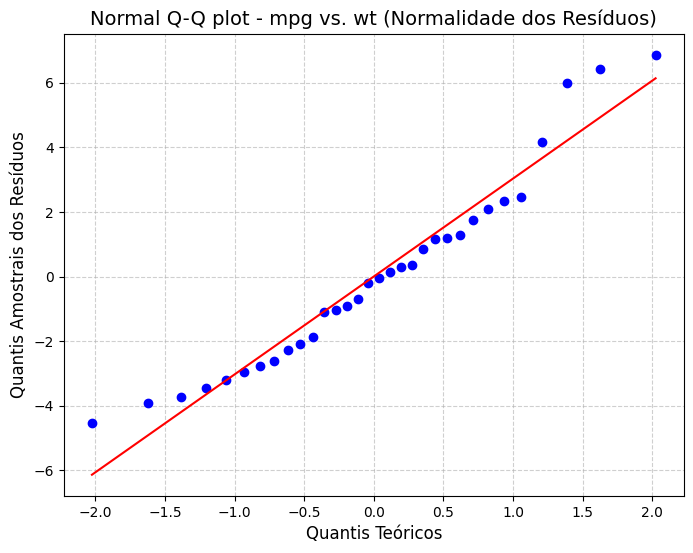

In [23]:
def plot_qq(model_name, residuals):
    """
    Gera um QQ-plot para verificar a normalidade dos resíduos.
    """
    plt.figure(figsize=(8, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f"Normal Q-Q plot - {model_name} (Normalidade dos Resíduos)", fontsize=14)
    plt.xlabel('Quantis Teóricos', fontsize=12)
    plt.ylabel('Quantis Amostrais dos Resíduos', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

print("\n--- Análise Gráfica de Normalidade (Q-Q Plot) ---")
plot_qq('mpg vs. wt', residuos_mpg_wt)

**Análise de Outliers (Resíduos Padronizados)**

Este gráfico ajuda a identificar potenciais outliers ou pontos influentes, geralmente fora do intervalo [-3, 3].


--- Análise de Outliers (Resíduos Padronizados) ---


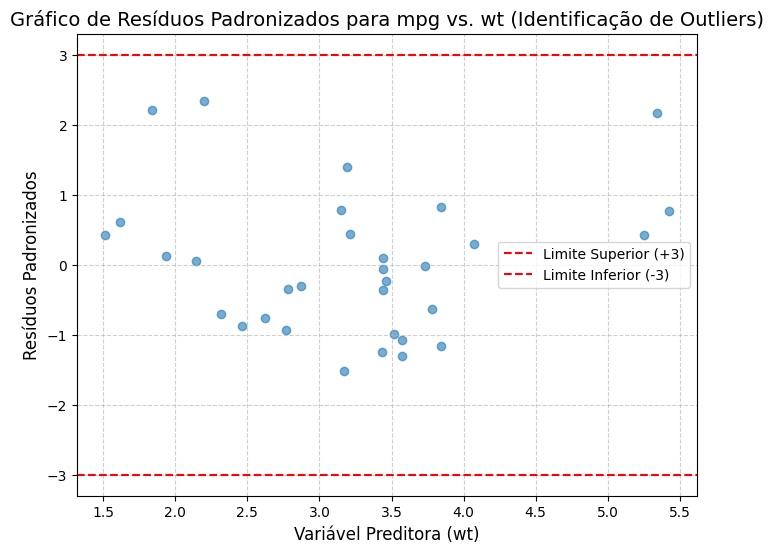

In [24]:
def plot_standardized_residuals(model_name, model_obj, X_data):
    """
    Gera um gráfico de resíduos padronizados para identificar outliers.
    """
    residuos_padronizados = model_obj.get_influence().resid_studentized_internal

    plt.figure(figsize=(8, 6))
    plt.scatter(X_data, residuos_padronizados, alpha=0.6)
    plt.axhline(y=3, color='r', linestyle='--', label='Limite Superior (+3)')
    plt.axhline(y=-3, color='r', linestyle='--', label='Limite Inferior (-3)')
    plt.title(f'Gráfico de Resíduos Padronizados para {model_name} (Identificação de Outliers)', fontsize=14)
    plt.xlabel(f'Variável Preditora ({model_name.split(" vs. ")[1]})', fontsize=12)
    plt.ylabel('Resíduos Padronizados', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

print("\n--- Análise de Outliers (Resíduos Padronizados) ---")
plot_standardized_residuals('mpg vs. wt', modelo_mpg_wt, X_wt)

No gráfico de resíduos padronizados para 'mpg vs. wt', todos os pontos estão bem dentro dos limites de +3 e -3. Não há indicação de outliers extremos ou observações altamente influentes. Isso é um ótimo sinal para a robustez do modelo.

## Análise e Interpretação do Modelo

Finalmente, vamos analisar o sumário do modelo que ajustamos para mpg em função de wt.

In [25]:
# Reexibindo o sumário do modelo para análise
print(modelo_mpg_wt.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.29e-10
Time:                        21:33:48   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.0

- const (Intercepto β0): O coeficiente do intercepto é 37.2851. Este é o mpg esperado quando o peso (wt) é zero. Embora um carro com peso zero não seja fisicamente possível, o intercepto é estatisticamente significativo (p-valor = 0.000).
- wt (Coeficiente β1): O coeficiente para wt é -5.3445. Isso significa que, para cada aumento de uma unidade (que representa 1000 lbs) no peso do carro (wt), o consumo de combustível (mpg) esperado diminui em aproximadamente 5.3445 milhas por galão. Este coeficiente é altamente significativo (p-valor = 0.000) e a direção negativa faz todo o sentido físico.

## Visualização do Modelo de Regressão Ajustado

Vamos plotar a linha de regressão ajustada sobre os pontos de dados para ver visualmente o ajuste do modelo.

In [ ]:
def plot_fitted_model(X_data, y_data, model_obj, model_name):
    """
    Gera um gráfico de dispersão com a linha de regressão ajustada.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_data, y=y_data, alpha=0.6)
    plt.plot(X_data, model_obj.fittedvalues, color='red', linewidth=2, label=f'Linha de Regressão (R²={model_obj.rsquared:.2f})')
    plt.title(f'Modelo de Regressão Ajustado: {model_name}', fontsize=14)
    plt.xlabel(f'Variável Preditora ({model_name.split(" vs. ")[1]})', fontsize=12)
    plt.ylabel('Variável Dependente ({})'.format(model_name.split(' ')[0]), fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

print("\n--- Visualização do Modelo de Regressão Ajustado ---")
plot_fitted_model(X_wt, y_mpg, modelo_mpg_wt, 'mpg vs. wt')